In [2]:
# Clustering con K-Means - Notebook para CC_GENERAL.csv
# Descripción: Notebook paso a paso que realiza EDA, feature engineering, clustering

In [3]:
# 1) Imports y configuración
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import linkage, dendrogram

# Opciones de visualización
plt.rcParams['figure.figsize'] = (10,6)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

In [5]:
# 2) Cargar datos
path = 'CC_GENERAL.csv'
if not os.path.exists(path):
    raise FileNotFoundError(f"No se encontró el archivo en {path}. Asegúrate de subir 'CC_GENERAL.csv' a /mnt/data.")

df = pd.read_csv(path)
print('Tamaño del dataset:', df.shape)
print('\nColumnas:')
print(df.columns.tolist())

Tamaño del dataset: (8950, 18)

Columnas:
['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


In [6]:
# 3) Primer vistazo (EDA rápido)
# 3.1 Primeras filas
print('\nPrimeras 5 filas:')
display(df.head())

# 3.2 Tipos y nulos
print('\nInformación general:')
display(df.info())

print('\nEstadísticas descriptivas (numéricas):')
display(df.describe().T)

# 3.3 Conteo de nulos por columna
print('\nValores nulos por columna:')
display(df.isnull().sum().sort_values(ascending=False))


Primeras 5 filas:


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null

None


Estadísticas descriptivas (numéricas):


,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000



Valores nulos por columna:


MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

In [7]:
# 4) Limpieza / imputación y selección inicial de features
# Decisión general:
# - Eliminar columnas no numéricas irrelevantes (IDs, texto libre), mantener variables relevantes.
# - Imputar nulos numéricos con la mediana y categóricos con la moda.

# Identificar columnas numéricas y categóricas
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print('Columnas numéricas:', num_cols)
print('Columnas categóricas:', cat_cols)


Columnas numéricas: ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
Columnas categóricas: ['CUST_ID']


In [17]:
# Si existe una columna 'ID' o similar, la removemos para clustering
possible_id_cols = [c for c in df.columns if c.lower() in ('id', 'ids', 'customer_id', 'cust_id')]
if possible_id_cols:
    print('Columnas de ID detectadas y eliminadas:', possible_id_cols)
    df = df.drop(columns=possible_id_cols)

# Volver a detectar columnas después de eliminar ID
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

# Imputación numérica
if num_cols:
    imputer_num = SimpleImputer(strategy='median')
    df[num_cols] = imputer_num.fit_transform(df[num_cols])

# Imputación categórica
if cat_cols:
    imputer_cat = SimpleImputer(strategy='most_frequent')
    df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])
else:
    print("No hay columnas categóricas en el dataset, se omite imputación categórica.")


No hay columnas categóricas en el dataset, se omite imputación categórica.


In [19]:
# 5) Feature engineering
# si existen columnas típicas de historial de tarjetas (p.ej. balance, limit, payments, etc.).

# Ejemplo 1: razón balance / limite si existen
if set(['BALANCE', 'CREDIT_LIMIT']).issubset([c.upper() for c in df.columns]):
    # buscamos columnas insensitive-case
    col_bal = [c for c in df.columns if c.upper()=='BALANCE'][0]
    col_lim = [c for c in df.columns if c.upper()=='CREDIT_LIMIT'][0]
    df['utilization_ratio'] = df[col_bal] / (df[col_lim].replace(0, np.nan))
    df['utilization_ratio'] = df['utilization_ratio'].fillna(0)
    print('\nSe creó feature utilization_ratio')

# Ejemplo 2: promedio de pagos si hay columnas mensuales named like PAY_1, PAY_2...
pay_cols = [c for c in df.columns if any(s in c.upper() for s in ['PAY', 'PAYMENT', 'PAY_'])]
if pay_cols and len(pay_cols)>1:
    df['avg_payment'] = df[pay_cols].mean(axis=1)
    print('\nSe creó feature avg_payment a partir de:', pay_cols)


Se creó feature utilization_ratio

Se creó feature avg_payment a partir de: ['PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'avg_payment']



Top variables por varianza: ['CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PURCHASES', 'CASH_ADVANCE', 'BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'PURCHASES_TRX', 'CASH_ADVANCE_TRX']


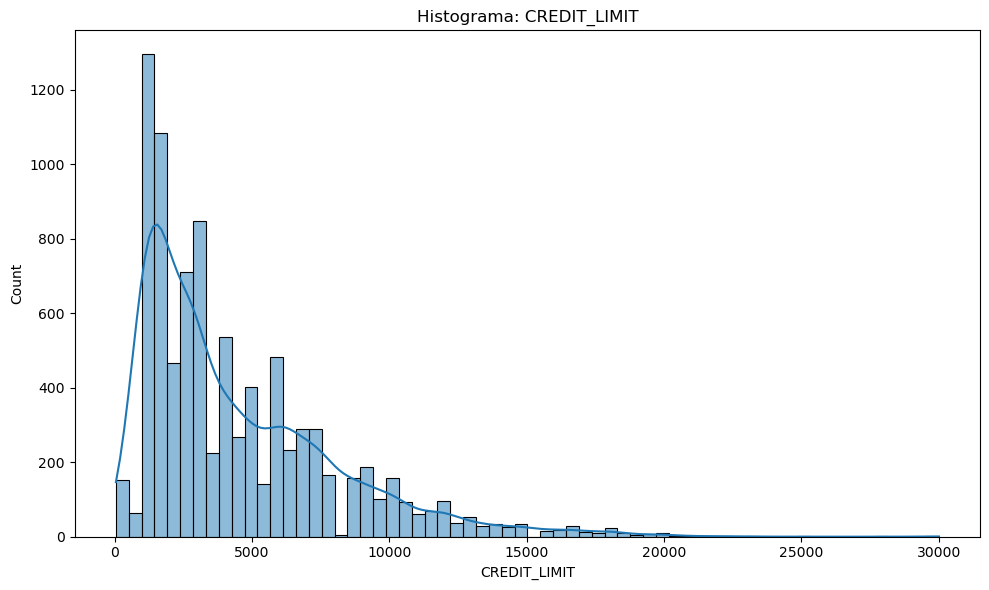

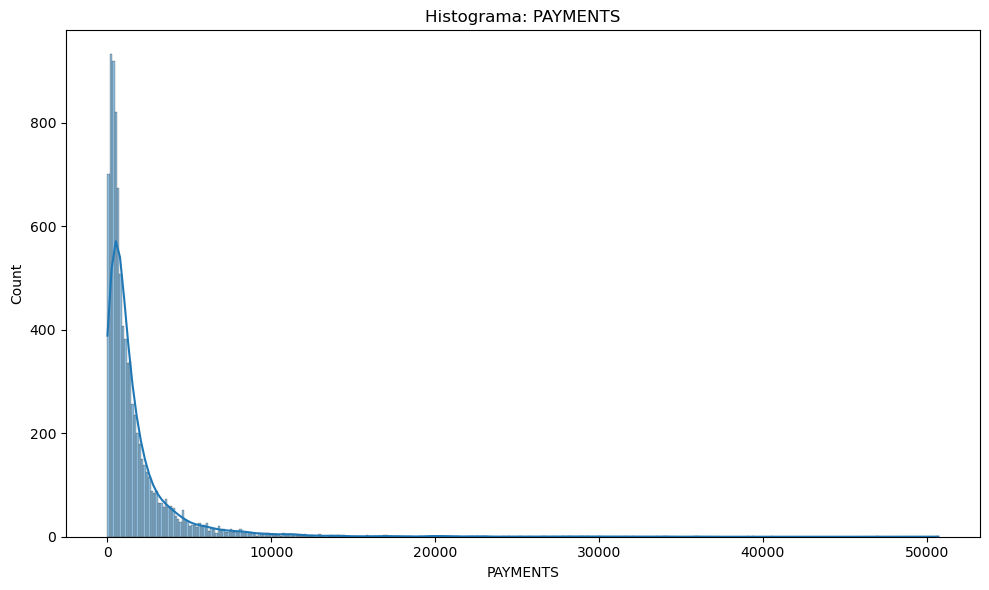

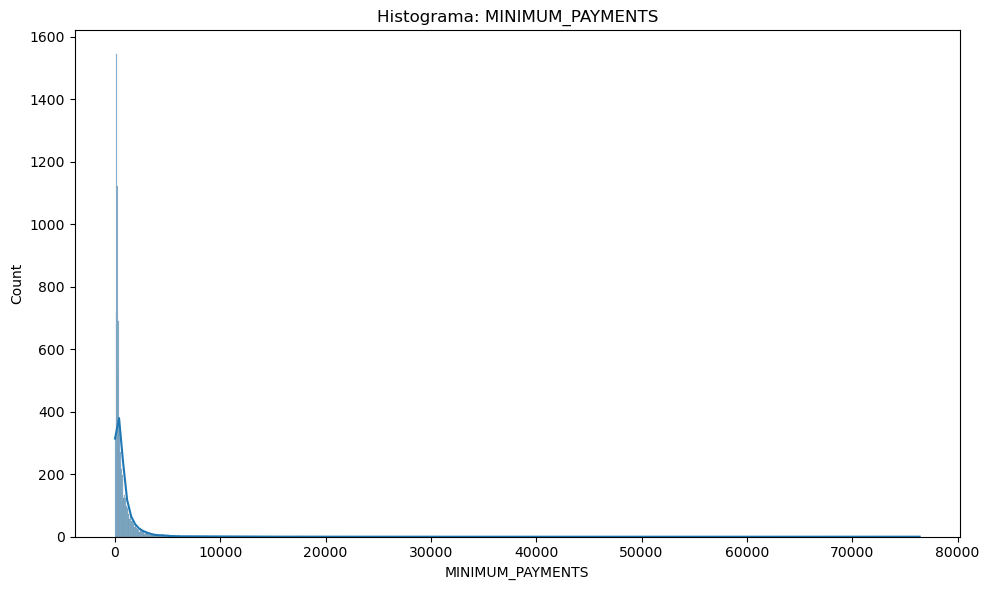

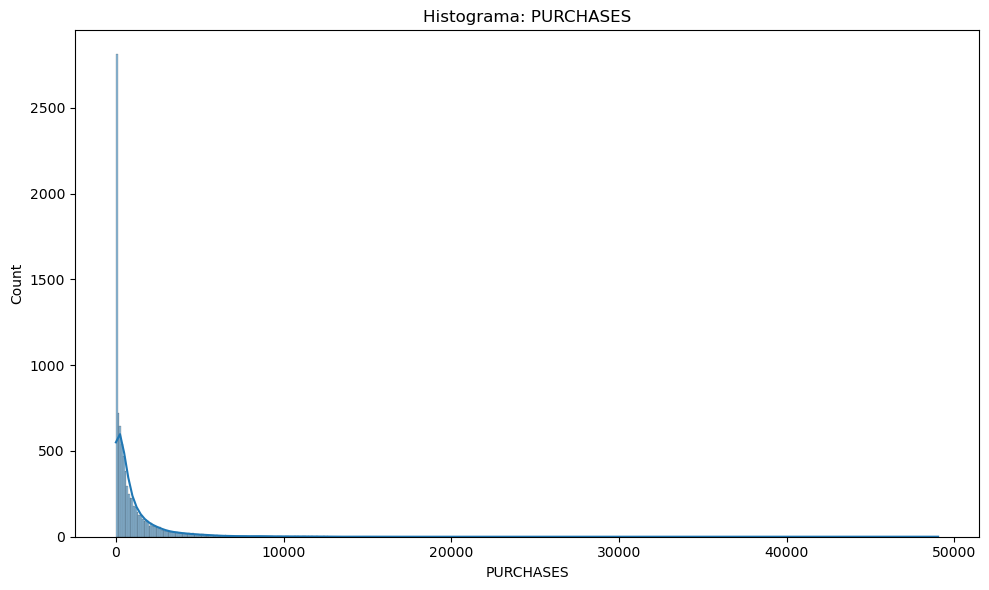

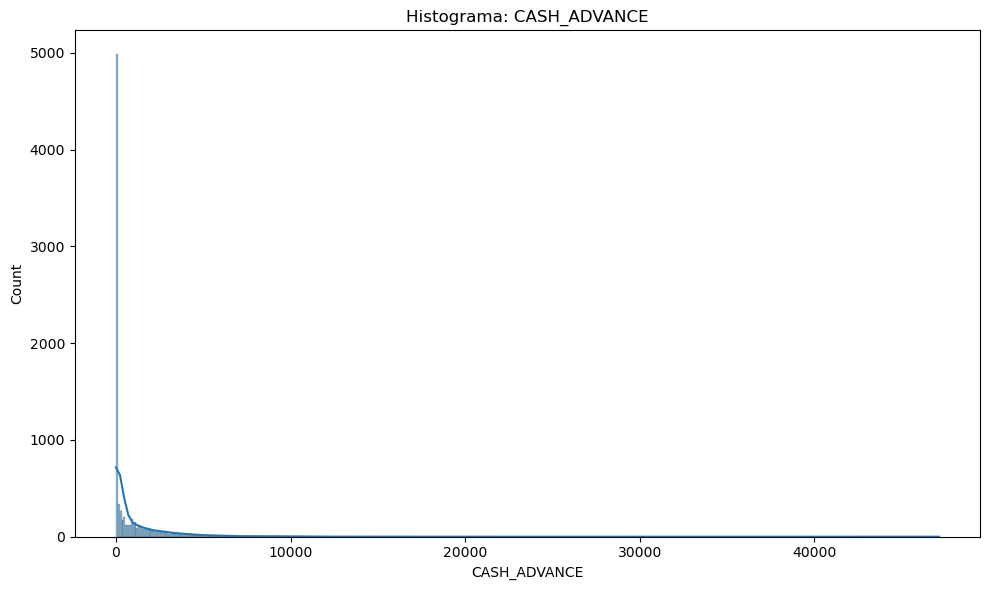

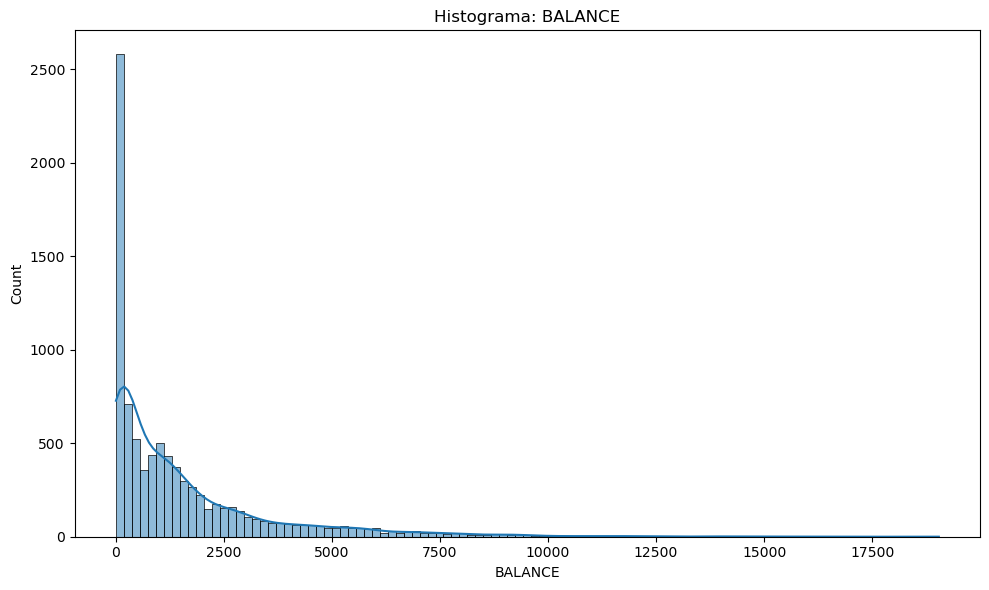

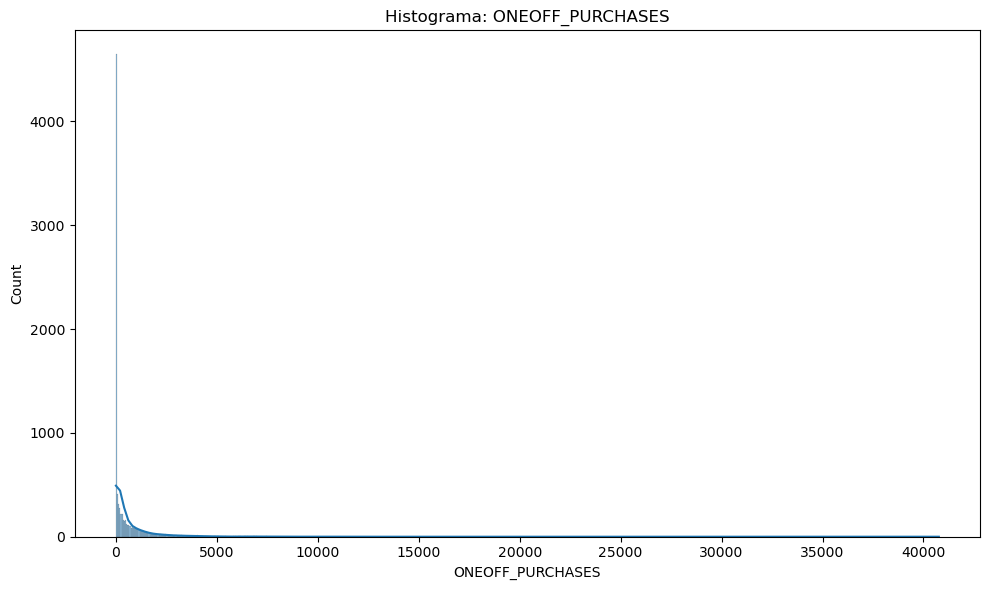

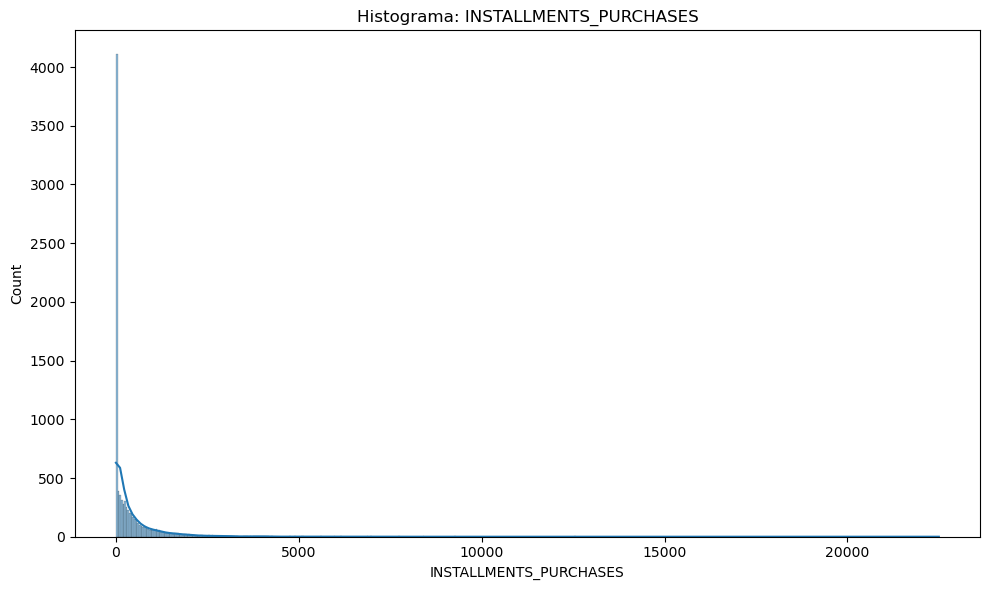

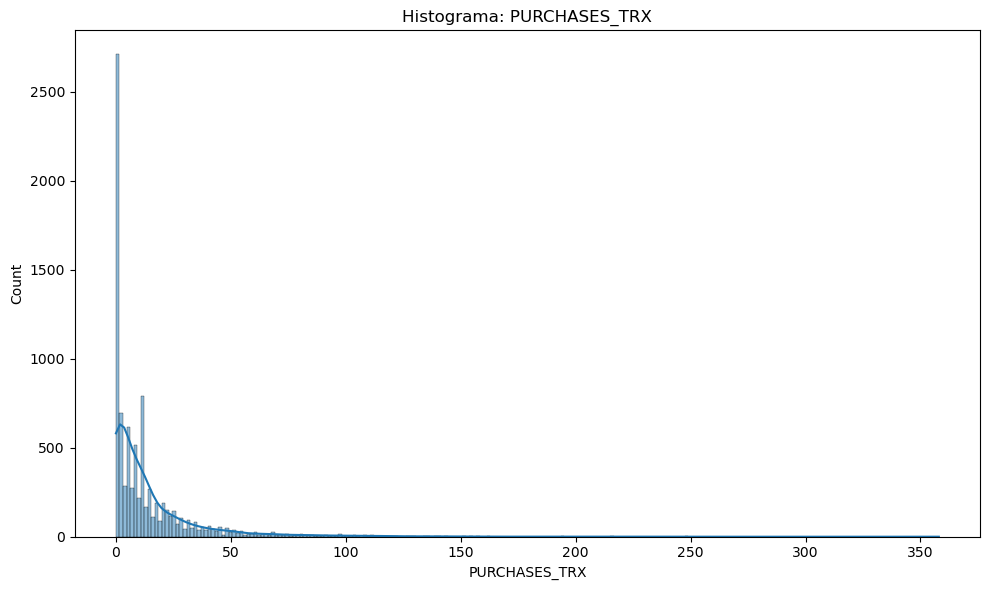

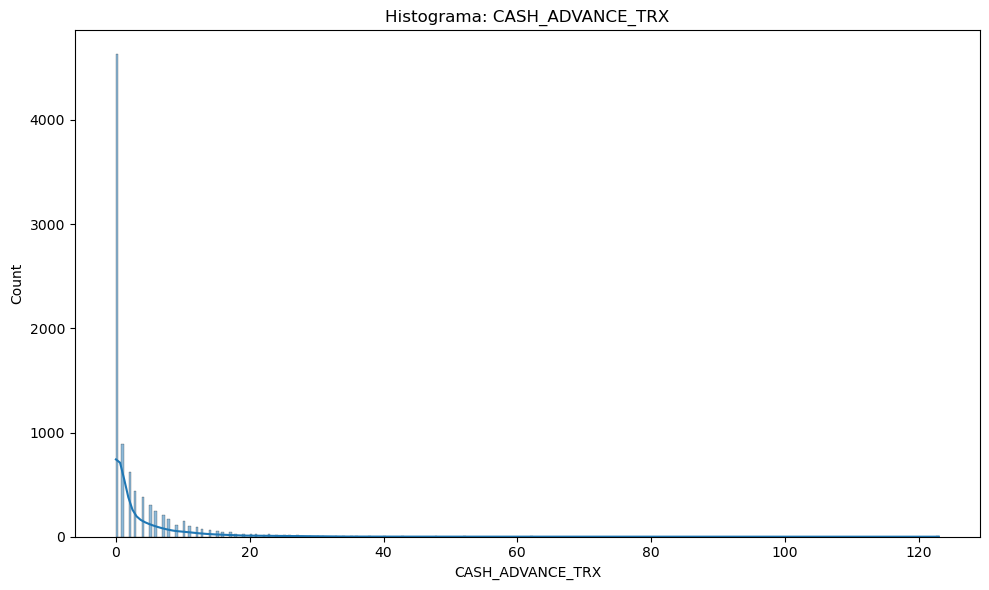

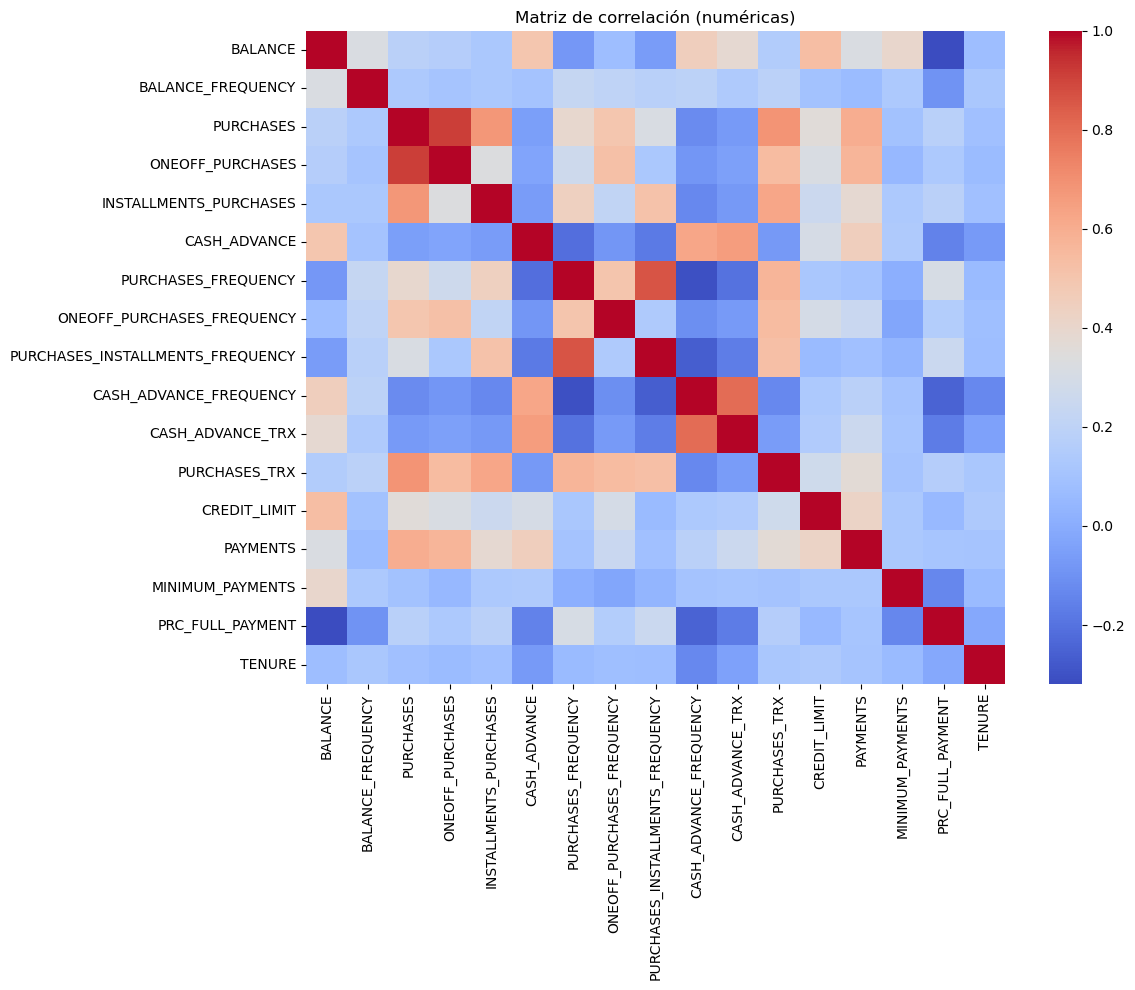

In [21]:
# 6) Análisis univariado y bivariado (visualizaciones)
# Histograma de las principales variables numéricas (top 10 por varianza)
variances = df[num_cols].var().sort_values(ascending=False)
top_vars = variances.index[:10].tolist()

print('\nTop variables por varianza:', top_vars)

for col in top_vars:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Histograma: {col}')
    plt.tight_layout()

# Matriz de correlación (heatmap)
plt.figure(figsize=(12,10))
cor = df[num_cols].corr()
sns.heatmap(cor, annot=False, cmap='coolwarm')
plt.title('Matriz de correlación (numéricas)')
plt.tight_layout()

In [22]:
# 7) Preparación de datos para clustering
# - Seleccionar features numéricas
# - Escalado (StandardScaler)
features = num_cols.copy()
# eliminar columnas con varianza 0
features = [f for f in features if df[f].var() > 0]

X = df[features].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print('Shape X_scaled:', X_scaled.shape)

Shape X_scaled: (8950, 17)


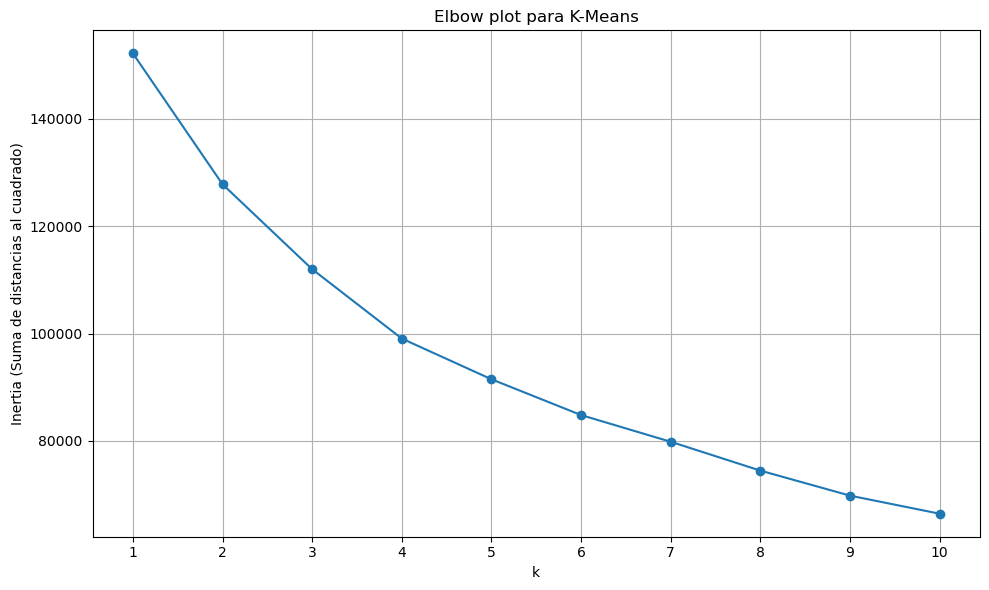

In [23]:
# 8) Elección de K-mean: Elbow plot y Silhouette
# Elbow
inertia = []
K_range = range(1,11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure()
plt.plot(K_range, inertia, '-o')
plt.xlabel('k')
plt.ylabel('Inertia (Suma de distancias al cuadrado)')
plt.title('Elbow plot para K-Means')
plt.xticks(K_range)
plt.grid(True)
plt.tight_layout()


Silhouette scores:
k=2: silhouette=0.2100
k=3: silhouette=0.2510
k=4: silhouette=0.1977
k=5: silhouette=0.1931
k=6: silhouette=0.2029
k=7: silhouette=0.2077
k=8: silhouette=0.2217
k=9: silhouette=0.2260
k=10: silhouette=0.2204


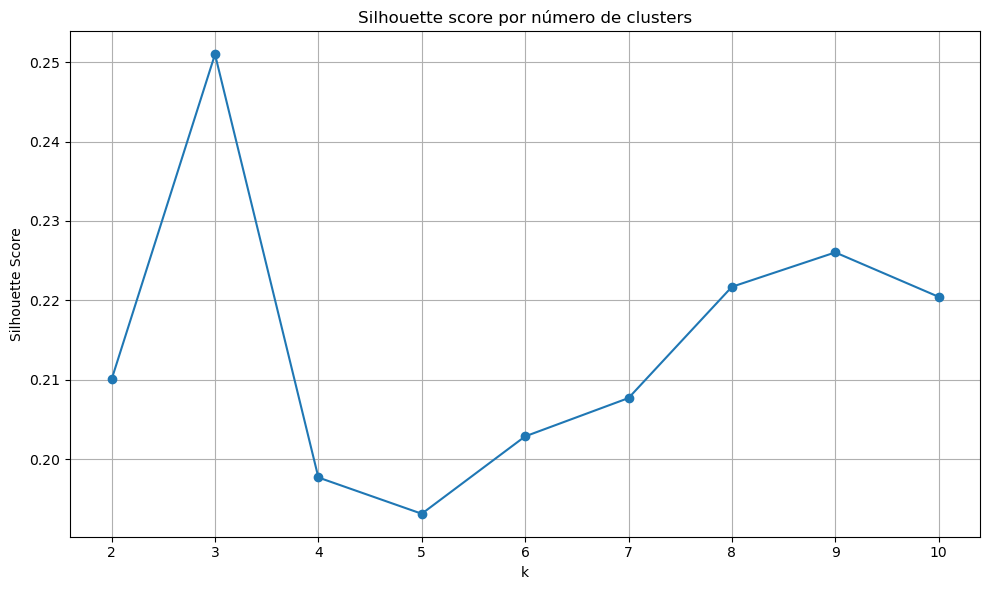

In [25]:
# Silhouette score para k entre 2 y 10
sil_scores = []
K_range2 = range(2,11)
for k in K_range2:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append(sil)

plt.figure()
plt.plot(list(K_range2), sil_scores, '-o')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette score por número de clusters')
plt.xticks(list(K_range2))
plt.grid(True)
plt.tight_layout()

print('\nSilhouette scores:')
for k,s in zip(K_range2, sil_scores):
    print(f'k={k}: silhouette={s:.4f}')

In [27]:
# 9)  K-Means con el k seleccionado (elegir k con base en elbow + silhouette)
# k por defecto: el que maximiza silhouette
best_k = int(K_range2[np.argmax(sil_scores)])
print('\nMejor k según silhouette:', best_k)

km_final = KMeans(n_clusters=best_k, random_state=42, n_init=50)
cluster_labels = km_final.fit_predict(X_scaled)

# Añadir etiquetas al df
df['cluster'] = cluster_labels


Mejor k según silhouette: 3



Silhouette score medio (modelo final): 0.25094878327513914


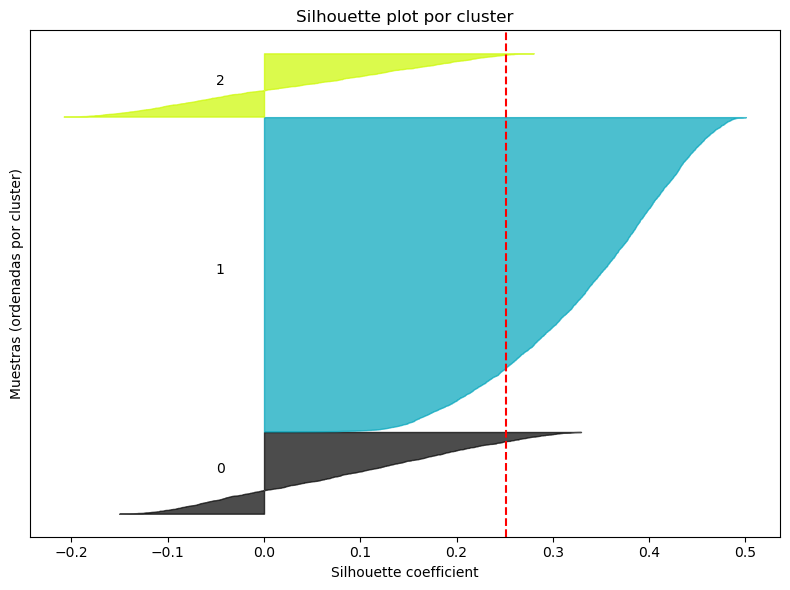

In [28]:
# 10) Evaluación: silhouette por muestra y visualización simple
sil_avg = silhouette_score(X_scaled, cluster_labels)
print('\nSilhouette score medio (modelo final):', sil_avg)

# Silhouette plot (visualización simplificada)
from matplotlib import cm

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(8, 6)

sample_sil_values = silhouette_samples(X_scaled, cluster_labels)

y_lower = 10
for i in range(best_k):
    ith_cluster_sil_values = sample_sil_values[cluster_labels == i]
    ith_cluster_sil_values.sort()
    size_cluster_i = ith_cluster_sil_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / best_k)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax1.set_title('Silhouette plot por cluster')
ax1.set_xlabel('Silhouette coefficient')
ax1.set_ylabel('Muestras (ordenadas por cluster)')
ax1.axvline(x=sil_avg, color='red', linestyle='--')
ax1.set_yticks([])
plt.tight_layout()


Dataset muy grande, usando 500 muestras aleatorias para dendrograma


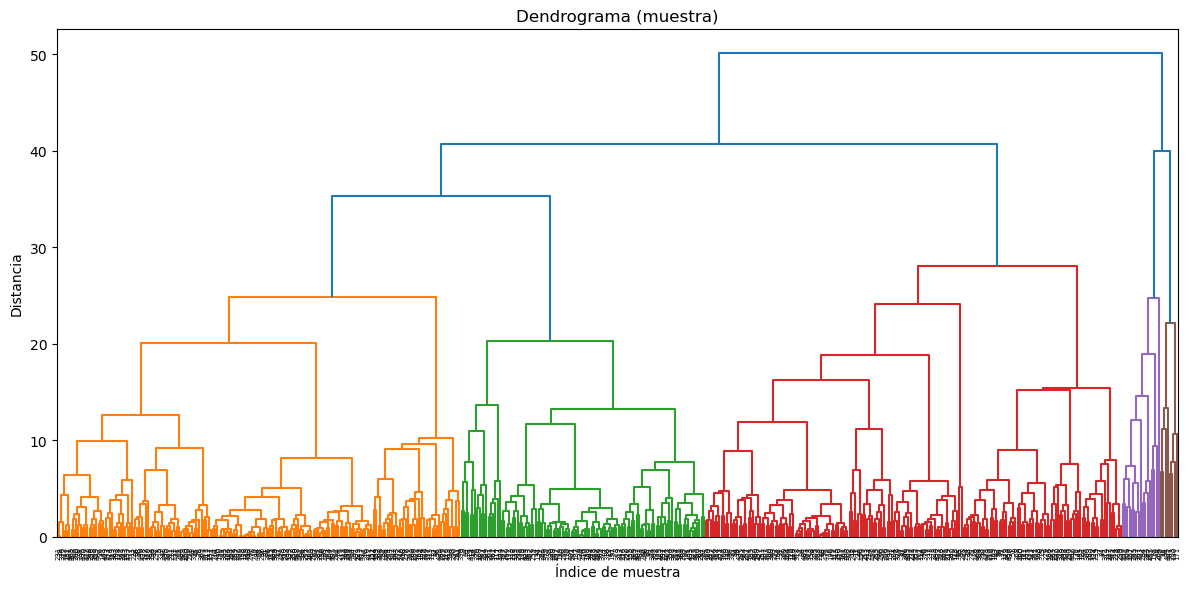

In [29]:
# 11) Dendrograma (comprobación jerárquica)
max_samples_for_dendro = 500
if X_scaled.shape[0] > max_samples_for_dendro:
    idx = np.random.choice(X_scaled.shape[0], max_samples_for_dendro, replace=False)
    X_sample = X_scaled[idx]
    print(f'Dataset muy grande, usando {max_samples_for_dendro} muestras aleatorias para dendrograma')
else:
    X_sample = X_scaled

linked = linkage(X_sample, method='ward')
plt.figure(figsize=(12,6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrograma (muestra)')
plt.xlabel('Índice de muestra')
plt.ylabel('Distancia')
plt.tight_layout()


Perfil (promedios) por cluster:


cluster,0,1,2
BALANCE,4001.119482,799.624298,2215.220739
BALANCE_FREQUENCY,0.958938,0.835052,0.981447
PURCHASES,387.969623,505.112900,4271.967762
ONEOFF_PURCHASES,249.618619,252.968596,2721.404972
INSTALLMENTS_PURCHASES,138.428638,252.464840,1551.049408
CASH_ADVANCE,3869.760265,332.210273,455.728015
PURCHASES_FREQUENCY,0.234140,0.464624,0.949145
ONEOFF_PURCHASES_FREQUENCY,0.111047,0.132307,0.668979
PURCHASES_INSTALLMENTS_FREQUENCY,0.146188,0.344700,0.744440
CASH_ADVANCE_FREQUENCY,0.447565,0.068460,0.062710



Tamaño de clusters:
cluster
0    1593
1    6124
2    1233
Name: count, dtype: int64


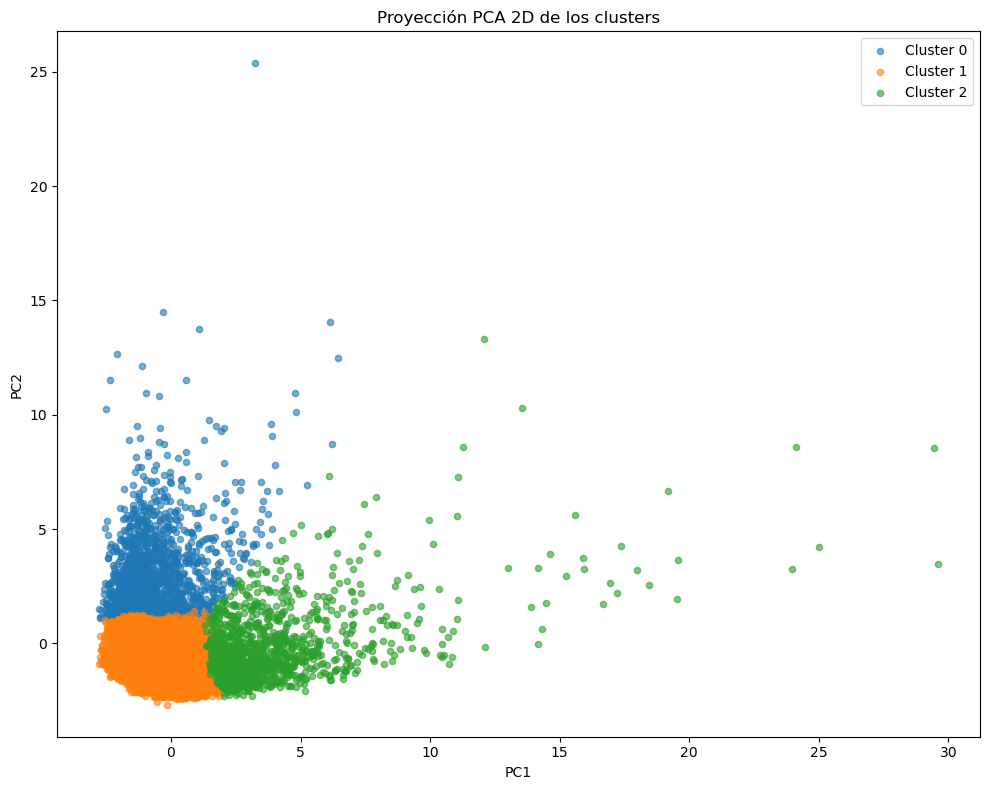

In [30]:
# 12) Visualización 2D mediante PCA y perfilamiento de clusters
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,8))
palette = sns.color_palette('tab10', best_k)
for i in range(best_k):
    plt.scatter(X_pca[cluster_labels==i,0], X_pca[cluster_labels==i,1], s=20, label=f'Cluster {i}', alpha=0.6)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Proyección PCA 2D de los clusters')
plt.legend()
plt.tight_layout()

# Perfilamiento de clusters: medias por cluster
cluster_profile = df.groupby('cluster')[features].mean().T
print('\nPerfil (promedios) por cluster:')
display(cluster_profile)

# También número de observaciones por cluster
print('\nTamaño de clusters:')
print(df['cluster'].value_counts().sort_index())


C:\Users\Rafael\AppData\Local\Temp\ipykernel_23288\603667250.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='cluster', y=var, data=df, estimator=np.mean, ci=None)
C:\Users\Rafael\AppData\Local\Temp\ipykernel_23288\603667250.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='cluster', y=var, data=df, estimator=np.mean, ci=None)
C:\Users\Rafael\AppData\Local\Temp\ipykernel_23288\603667250.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='cluster', y=var, data=df, estimator=np.mean, ci=None)
C:\Users\Rafael\AppData\Local\Temp\ipykernel_23288\603667250.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='cluster', y=var, data=df, estimator=np.mean, ci=None)
C:\Users\Rafael\AppData\Local\Temp\ipykernel_23288\603667250.py:6: FutureWar

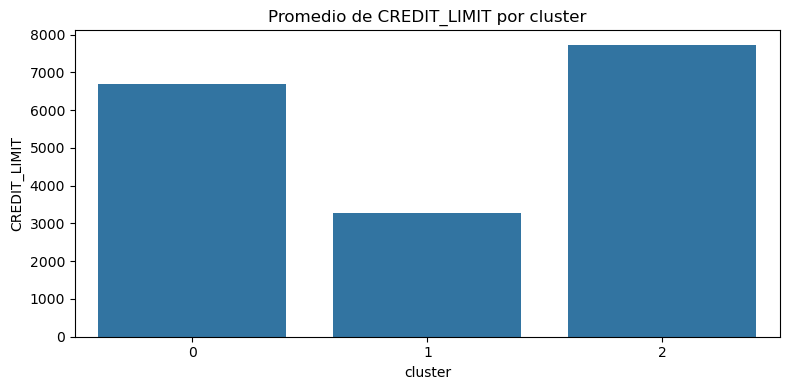

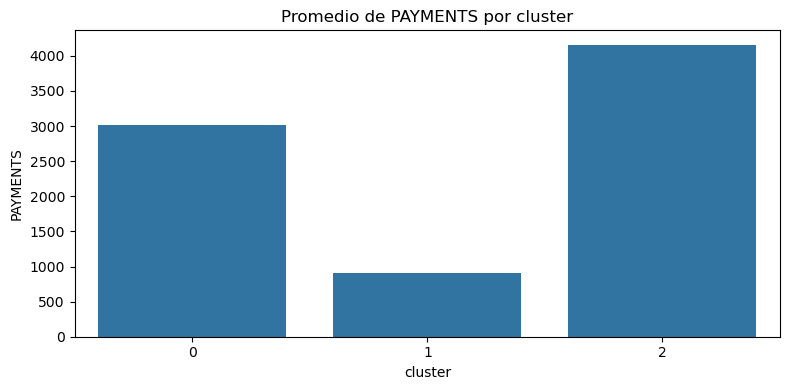

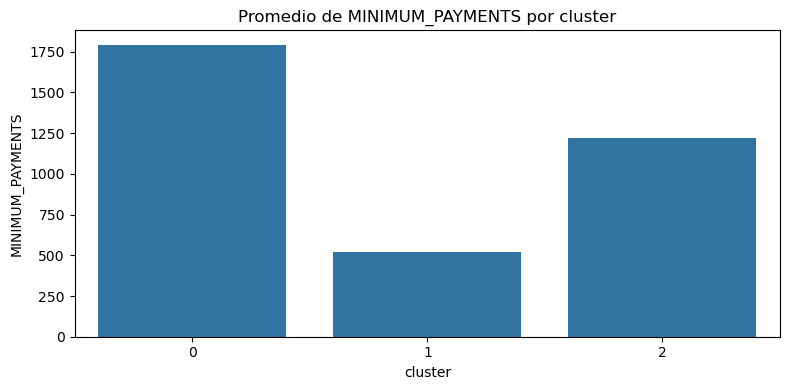

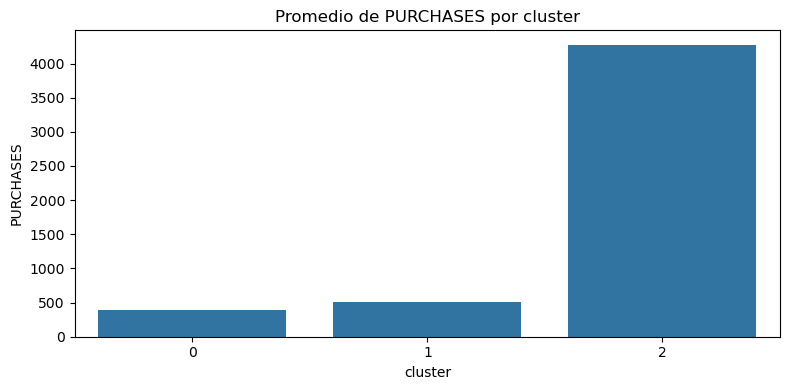

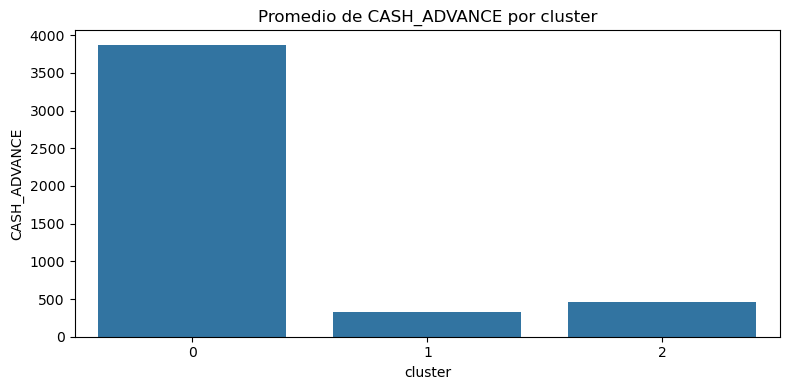

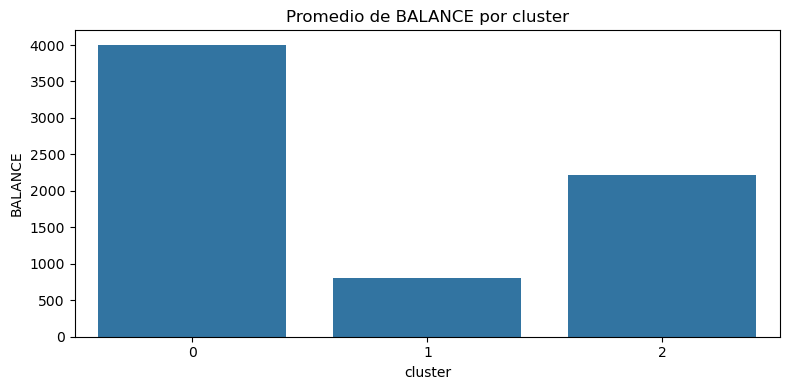

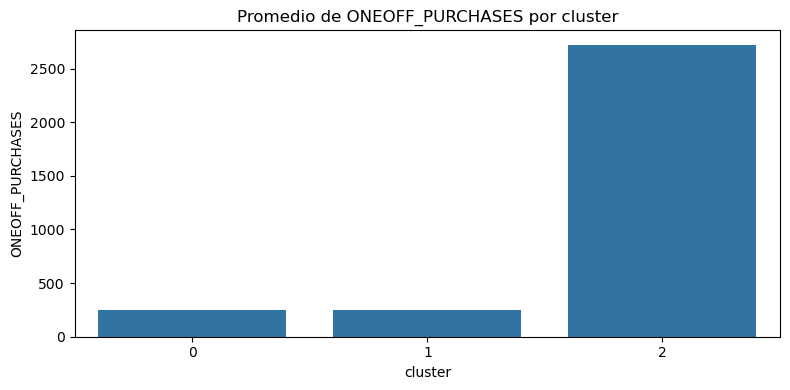

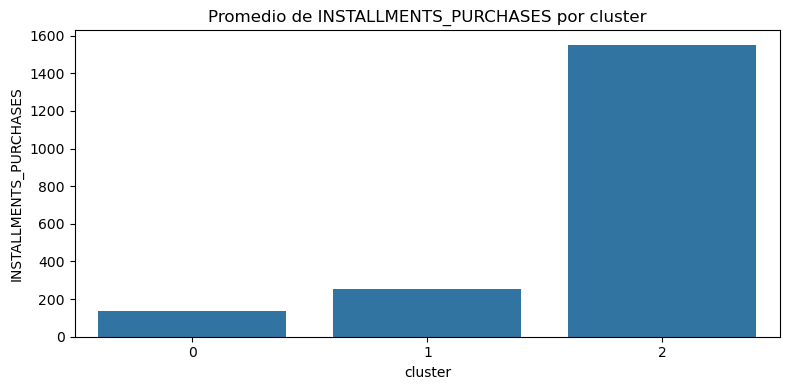

In [31]:
# 13) Visualizaciones de profiling: barras
# Para cada variable top_vars, mostrar promedio por cluster (máximo 8 variables para no saturar)
vars_to_plot = top_vars[:8]
for var in vars_to_plot:
    plt.figure(figsize=(8,4))
    sns.barplot(x='cluster', y=var, data=df, estimator=np.mean, ci=None)
    plt.title(f'Promedio de {var} por cluster')
    plt.tight_layout()


In [32]:
# Interpretación final
print('\nInterpretación / pasos siguientes sugeridos:')
print('- Revisar variables que más discriminan entre clusters (usar ANOVA o feature importance con un clasificador).')
print('- Analizar perfil de clientes por cluster: riesgo (default), frecuencia de uso, balance, etc. dependiendo de tus columnas. ') 
print('- Considerar renombrar clusters por etiquetas comerciales: p.ej. "Alto riesgo / Alto saldo" según medias. ')
print('- Validar estabilidad de clusters con muestreo repetido o cross-validation de clustering (bootstrap).')



Interpretación / pasos siguientes sugeridos:
- Revisar variables que más discriminan entre clusters (usar ANOVA o feature importance con un clasificador).
- Analizar perfil de clientes por cluster: riesgo (default), frecuencia de uso, balance, etc. dependiendo de tus columnas. 
- Considerar renombrar clusters por etiquetas comerciales: p.ej. "Alto riesgo / Alto saldo" según medias. 
- Validar estabilidad de clusters con muestreo repetido o cross-validation de clustering (bootstrap).
